IMPORTING THE LIBRARIES

In [11]:
import tensorflow as  tf
from tensorflow import keras
import os
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Conv1D,Dropout,MaxPooling1D,Activation,Flatten,Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [12]:
test_path=os.path.join(os.getcwd(),"data")
test_path

'C:\\Users\\Sharath\\Desktop\\stuff\\projects\\proj\\data'

In [5]:
import numpy as np    #This function  displays confusion matrix
import matplotlib.pyplot as plt
import itertools
cmap=plt.cm.Blues
title='Confusion matrix'
# classes = Le.classes_
normalize=False
figname = 'model3.jpg'

def plot_confusion_matrix(cm, classes, figname, normalize=False, title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print("Confusion matrix, without normalization")
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
 #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")
        plt.tight_layout()
#         plt.savefig(figname)

In [6]:
def prep_labels(Actor_dir): #this function takes Audio Directory as i/p and returns a Numpy array containing the file_path,gender,emotion
    emotion=[]
    gender=[]
    audios=[]
    emotion_d={1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}
    gender_d={0:'female',1:'male'}
    for actor in os.listdir(Actor_dir):
        file_p=(os.path.join(Actor_dir,actor))
        for recording in os.listdir(file_p):
            if recording[6:-16]in ["02","03","04","05"]:
                emotion.append(int(recording[6:-16]))
                gender.append(int(recording[18:-4])%2)
                audios.append(os.path.join(file_p,recording))
    gender=[gender_d[i] for i in gender]
    emotion=[emotion_d[i] for i in emotion]
    return np.c_[audios,gender,emotion]

Features function takes a list of address(Audio) and returns a Pandas DataFrame containing the melvalues avgd over all the time frames.
shape=(n,n_mells)
n=number of examples
    

In [7]:
def features(Path,sample_rate=22050*2,offset=0.5,n_mfcc=13,duration=2.5):
    df = pd.DataFrame(columns=['features'])
    count=0
    for f in list(Path):
        X, sample_rate = librosa.load(f, res_type='kaiser_fast',duration=duration,sr=sample_rate,offset=offset)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=n_mfcc).T,axis=0)
        features = mfccs
        df.loc[count] = [features]
        count=count+1
        d=pd.DataFrame(df['features'].values.tolist())
    return d

In [10]:
df_final=features(prep_labels(test_path)[:,0],n_mfcc=40)

NameError: name 'test_path' is not defined

In [9]:
df_final["emotion"]=prep_labels(test_path)[:,2]

In [10]:
df_final

0           1          2          3          4          5  \
0   -691.554016  103.488388   6.234205  18.971476   8.451644  18.539339   
1   -669.990479  111.411613  10.758529  15.129254   8.621660  20.590872   
2   -660.321472  111.567696   4.625660  19.650215   6.706089  18.305843   
3   -663.058350  111.353386   6.952808  16.100903   8.186879  18.408474   
4   -680.847107  121.460922  10.062194  21.828939   7.593652  24.082800   
..          ...         ...        ...        ...        ...        ...   
763 -444.119110   73.669128 -28.460447   5.365310 -13.476593  -2.534122   
764 -378.511078   64.218536 -32.865643  11.794813 -10.838286 -13.677436   
765 -415.127319   68.543427 -34.881615  10.059309 -12.314293  -7.163306   
766 -440.400391   73.256340 -24.545799  10.807652 -14.200200  -3.927950   
767 -486.741333   42.567852 -26.040928  12.394094 -16.908117  -6.012173   

             6          7          8          9  ...        31        32  \
0    -6.382955   6.202209 -10.171426  -0.678910  ... -5.225513 -0.647115   
1    -5.424139   4.473267  -9.863037  -1.271303  ... -4.514940 -1.264935   
2    -6.093471  10.697109 -10.637363   0.421806  ... -5.643905 -0.768427   
3    -6.693346   9.646807 -11.229571  -1.220288  ... -4.297531 -1.210608   
4    -7.907874   8.599798 -12.025018   4.583032  ... -3.877761  0.625304   
..         ...        ...        ...        ...  ...       ...       ...   
763 -30.909962  -3.104536 -14.926821 -13.822457  ...  3.538071  7.758658   
764 -26.487675   1.482656 -14.414303 -12.062708  ...  6.069856  4.045506   
765 -27.360477   2.133626 -14.272416 -12.633283  ...  9.127749  5.921012   
766 -24.290613  -3.342228 -17.595304 -11.925268  ...  3.089315  6.614276   
767 -18.903172   0.631802 -16.163420  -7.842727  ...  8.720415  5.919779   

            33        34         35         36        37        38        39  \
0    -0.530049 -2.785005   0.125315  -1.336625 -2.389767 -0.677985 -2.257579   
1    -1.201889 -2.088279  -0.541381  -2.506760 -3.407242 -2.235733 -3.555218   
2    -0.937701 -3.438322  -0.336898  -2.816852 -2.498607 -1.849675 -2.227733   
3    -1.576615 -3.309341  -0.375529  -2.907807 -3.097103 -0.968241 -2.492663   
4    -2.025431 -2.090710  -0.976551  -2.383626 -3.999593 -3.170493 -2.492446   
..         ...       ...        ...        ...       ...       ...       ...   
763  10.049922  6.853305   7.994804  10.021395  4.083268  3.643723  0.631288   
764   2.930989 -0.176050  -0.430975   0.593558 -0.287489  2.036106  0.191679   
765   1.140636  1.266077  -0.284112   3.392887  1.678638  0.742106 -0.852997   
766  10.623822  9.390310  10.567907   9.109989  3.990542  1.412750 -1.220157   
767   5.353457  1.388490   1.488488   1.632382 -0.146163  1.004053 -0.419241   

     emotion  
0       calm  
1       calm  
2       calm  
3       calm  
4       calm  
..       ...  
763    angry  
764    angry  
765    angry  
766    angry  
767    angry  

[768 rows x 41 columns]

In [11]:
df_final

0           1          2          3          4          5  \
0   -691.554016  103.488388   6.234205  18.971476   8.451644  18.539339   
1   -669.990479  111.411613  10.758529  15.129254   8.621660  20.590872   
2   -660.321472  111.567696   4.625660  19.650215   6.706089  18.305843   
3   -663.058350  111.353386   6.952808  16.100903   8.186879  18.408474   
4   -680.847107  121.460922  10.062194  21.828939   7.593652  24.082800   
..          ...         ...        ...        ...        ...        ...   
763 -444.119110   73.669128 -28.460447   5.365310 -13.476593  -2.534122   
764 -378.511078   64.218536 -32.865643  11.794813 -10.838286 -13.677436   
765 -415.127319   68.543427 -34.881615  10.059309 -12.314293  -7.163306   
766 -440.400391   73.256340 -24.545799  10.807652 -14.200200  -3.927950   
767 -486.741333   42.567852 -26.040928  12.394094 -16.908117  -6.012173   

             6          7          8          9  ...        31        32  \
0    -6.382955   6.202209 -10.171426  -0.678910  ... -5.225513 -0.647115   
1    -5.424139   4.473267  -9.863037  -1.271303  ... -4.514940 -1.264935   
2    -6.093471  10.697109 -10.637363   0.421806  ... -5.643905 -0.768427   
3    -6.693346   9.646807 -11.229571  -1.220288  ... -4.297531 -1.210608   
4    -7.907874   8.599798 -12.025018   4.583032  ... -3.877761  0.625304   
..         ...        ...        ...        ...  ...       ...       ...   
763 -30.909962  -3.104536 -14.926821 -13.822457  ...  3.538071  7.758658   
764 -26.487675   1.482656 -14.414303 -12.062708  ...  6.069856  4.045506   
765 -27.360477   2.133626 -14.272416 -12.633283  ...  9.127749  5.921012   
766 -24.290613  -3.342228 -17.595304 -11.925268  ...  3.089315  6.614276   
767 -18.903172   0.631802 -16.163420  -7.842727  ...  8.720415  5.919779   

            33        34         35         36        37        38        39  \
0    -0.530049 -2.785005   0.125315  -1.336625 -2.389767 -0.677985 -2.257579   
1    -1.201889 -2.088279  -0.541381  -2.506760 -3.407242 -2.235733 -3.555218   
2    -0.937701 -3.438322  -0.336898  -2.816852 -2.498607 -1.849675 -2.227733   
3    -1.576615 -3.309341  -0.375529  -2.907807 -3.097103 -0.968241 -2.492663   
4    -2.025431 -2.090710  -0.976551  -2.383626 -3.999593 -3.170493 -2.492446   
..         ...       ...        ...        ...       ...       ...       ...   
763  10.049922  6.853305   7.994804  10.021395  4.083268  3.643723  0.631288   
764   2.930989 -0.176050  -0.430975   0.593558 -0.287489  2.036106  0.191679   
765   1.140636  1.266077  -0.284112   3.392887  1.678638  0.742106 -0.852997   
766  10.623822  9.390310  10.567907   9.109989  3.990542  1.412750 -1.220157   
767   5.353457  1.388490   1.488488   1.632382 -0.146163  1.004053 -0.419241   

     emotion  
0       calm  
1       calm  
2       calm  
3       calm  
4       calm  
..       ...  
763    angry  
764    angry  
765    angry  
766    angry  
767    angry  

[768 rows x 41 columns]

In [12]:
 X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,:-1],df_final.iloc[:,-1], test_size=0.33, random_state=42)

In [13]:
Le=LabelEncoder()
Le.fit(df_final["emotion"])

LabelEncoder()

In [15]:
y_train=Le.transform(y_train)
y_test=Le.transform(y_test)

In [13]:
dtc = DecisionTreeClassifier() #decision tree classifier


In [17]:
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [18]:
predictions = dtc.predict(X_test)


Confusion matrix, without normalization


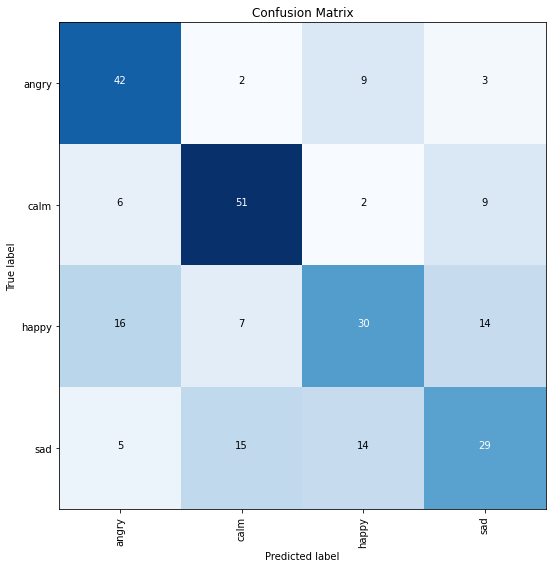

In [21]:
cm = confusion_matrix( y_test,predictions)
plot_confusion_matrix(cm, classes = Le.classes_, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete2.jpg')

In [22]:
print(classification_report(y_test,predictions,target_names=Le.classes_))

              precision    recall  f1-score   support

       angry       0.61      0.75      0.67        56
        calm       0.68      0.75      0.71        68
       happy       0.55      0.45      0.49        67
         sad       0.53      0.46      0.49        63

    accuracy                           0.60       254
   macro avg       0.59      0.60      0.59       254
weighted avg       0.59      0.60      0.59       254



In [23]:
rfc = RandomForestClassifier(criterion="gini", max_depth=10, max_features="log2", 
                                 max_leaf_nodes = 100, min_samples_leaf = 3, min_samples_split = 20, 
                                 n_estimators= 22000, random_state= 5)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=100,
                       min_samples_leaf=3, min_samples_split=20,
                       n_estimators=22000, random_state=5)

In [24]:
predictions = rfc.predict(X_test)

In [25]:
print(classification_report(y_test,predictions,target_names=Le.classes_))

              precision    recall  f1-score   support

       angry       0.71      0.95      0.81        56
        calm       0.67      0.84      0.75        68
       happy       0.65      0.45      0.53        67
         sad       0.60      0.46      0.52        63

    accuracy                           0.67       254
   macro avg       0.66      0.67      0.65       254
weighted avg       0.66      0.67      0.65       254



Confusion matrix, without normalization


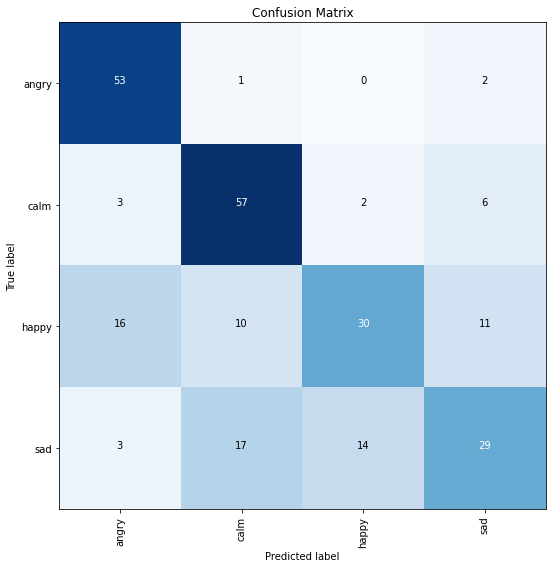

In [26]:
cm = confusion_matrix( y_test,predictions)
plot_confusion_matrix(cm, classes = Le.classes_, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete2.jpg')

Training on a nn:

In [27]:
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

In [30]:
model = keras.models.Sequential()
model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [31]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 40, 128)           768       
_________________________________________________________________
activation_3 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)            82048     
_________________________________________________________________
activation_4 (Activation)    (None, 5, 128)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 128)           

In [35]:
%load_ext tensorboard

In [32]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [66]:
import datetime
log_dir = "model_board_1" 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [67]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [68]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test),callbacks=[tensorboard_callback])


Epoch 1/1000
33/33 [==============================] - 0s 11ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.1738 - val_accuracy: 0.7835
Epoch 2/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 1.1938 - val_accuracy: 0.7835
Epoch 3/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.0097 - accuracy: 0.9981 - val_loss: 1.0462 - val_accuracy: 0.7992
Epoch 4/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 1.1103 - val_accuracy: 0.7874
Epoch 5/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 1.1209 - val_accuracy: 0.7992
Epoch 6/1000
33/33 [==============================] - 0s 5ms/step - loss: 0.0266 - accuracy: 0.9922 - val_loss: 1.2316 - val_accuracy: 0.7677
Epoch 7/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0097 - accuracy: 0.9961 - val_loss: 1.0872 - val_accuracy: 0.7992
Epoch

Epoch 115/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.9981 - val_loss: 1.1744 - val_accuracy: 0.7835
Epoch 116/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 1.2618 - val_accuracy: 0.7756
Epoch 117/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 1.1032 - val_accuracy: 0.7795
Epoch 118/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0100 - accuracy: 0.9981 - val_loss: 1.1470 - val_accuracy: 0.7874
Epoch 119/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.1675 - val_accuracy: 0.7874
Epoch 120/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0217 - accuracy: 0.9903 - val_loss: 1.1333 - val_accuracy: 0.7756
Epoch 121/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 1.1829 - val_accuracy:

Epoch 228/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0087 - accuracy: 0.9961 - val_loss: 1.2856 - val_accuracy: 0.7874
Epoch 229/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 1.1811 - val_accuracy: 0.7913
Epoch 230/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.2582 - val_accuracy: 0.7756
Epoch 231/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.1988 - val_accuracy: 0.7874
Epoch 232/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 1.2847 - val_accuracy: 0.7717
Epoch 233/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9942 - val_loss: 1.2194 - val_accuracy: 0.7756
Epoch 234/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9981 - val_loss: 1.3139 - val_accuracy:

Epoch 285/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9942 - val_loss: 1.2343 - val_accuracy: 0.7835
Epoch 286/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0150 - accuracy: 0.9961 - val_loss: 1.2787 - val_accuracy: 0.7913
Epoch 287/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 1.3018 - val_accuracy: 0.7913
Epoch 288/1000
33/33 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.9942 - val_loss: 1.2053 - val_accuracy: 0.8031
Epoch 289/1000
33/33 [==============================] - 0s 9ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 1.3360 - val_accuracy: 0.7756
Epoch 290/1000
33/33 [==============================] - 0s 9ms/step - loss: 0.0148 - accuracy: 0.9942 - val_loss: 1.2056 - val_accuracy: 0.8110
Epoch 291/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9981 - val_loss: 1.2782 - val_accuracy:

Epoch 398/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9942 - val_loss: 1.2067 - val_accuracy: 0.7835
Epoch 399/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.2687 - val_accuracy: 0.7874
Epoch 400/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 1.1731 - val_accuracy: 0.7835
Epoch 401/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 1.1883 - val_accuracy: 0.8031
Epoch 402/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.3244 - val_accuracy: 0.7795
Epoch 403/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.2055 - val_accuracy: 0.7913
Epoch 404/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9961 - val_loss: 1.1945 - val_accuracy:

Epoch 455/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.2164 - val_accuracy: 0.7913
Epoch 456/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.2906 - val_accuracy: 0.7756
Epoch 457/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.2152 - val_accuracy: 0.7874
Epoch 458/1000
33/33 [==============================] - 0s 8ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 1.1240 - val_accuracy: 0.7953
Epoch 459/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 1.2635 - val_accuracy: 0.7835
Epoch 460/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 1.2467 - val_accuracy: 0.7835
Epoch 461/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9981 - val_loss: 1.2437 - val_accuracy:

Epoch 512/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0270 - accuracy: 0.9961 - val_loss: 1.3080 - val_accuracy: 0.7953
Epoch 513/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 1.2964 - val_accuracy: 0.7835
Epoch 514/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 0.9981 - val_loss: 1.3212 - val_accuracy: 0.7913
Epoch 515/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9961 - val_loss: 1.3110 - val_accuracy: 0.7874
Epoch 516/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.9961 - val_loss: 1.2854 - val_accuracy: 0.7874
Epoch 517/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.3195 - val_accuracy: 0.7953
Epoch 518/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9961 - val_loss: 1.2831 - val_accuracy:

Epoch 625/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 0.9981 - val_loss: 1.4012 - val_accuracy: 0.7795
Epoch 626/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.9942 - val_loss: 1.3469 - val_accuracy: 0.7953
Epoch 627/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.3248 - val_accuracy: 0.7874
Epoch 628/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 1.4311 - val_accuracy: 0.7795
Epoch 629/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 1.3017 - val_accuracy: 0.7992
Epoch 630/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.3589 - val_accuracy: 0.7953
Epoch 631/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.3207 - val_accuracy:

Epoch 682/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 1.3273 - val_accuracy: 0.7874
Epoch 683/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.2991 - val_accuracy: 0.7953
Epoch 684/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.2765 - val_accuracy: 0.7756
Epoch 685/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.4266 - val_accuracy: 0.7717
Epoch 686/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.3955 - val_accuracy: 0.7874
Epoch 687/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0092 - accuracy: 0.9981 - val_loss: 1.3407 - val_accuracy: 0.7677
Epoch 688/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.3020 - val_accuracy:

Epoch 795/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 1.2542 - val_accuracy: 0.7874
Epoch 796/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.9961 - val_loss: 1.3038 - val_accuracy: 0.7835
Epoch 797/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.2748 - val_accuracy: 0.7795
Epoch 798/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 1.3821 - val_accuracy: 0.7835
Epoch 799/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 1.3177 - val_accuracy: 0.7913
Epoch 800/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 1.3131 - val_accuracy: 0.7835
Epoch 801/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.9961 - val_loss: 1.2908 - val_accuracy:

Epoch 852/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0082 - accuracy: 0.9981 - val_loss: 1.2564 - val_accuracy: 0.7953
Epoch 853/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.2888 - val_accuracy: 0.7913
Epoch 854/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9981 - val_loss: 1.3481 - val_accuracy: 0.7598
Epoch 855/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.4096 - val_accuracy: 0.7953
Epoch 856/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.9981 - val_loss: 1.2539 - val_accuracy: 0.7992
Epoch 857/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0137 - accuracy: 0.9961 - val_loss: 1.2792 - val_accuracy: 0.8110
Epoch 858/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 1.3377 - val_accuracy:

Epoch 965/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 0.9981 - val_loss: 1.5197 - val_accuracy: 0.7913
Epoch 966/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 1.4480 - val_accuracy: 0.7874
Epoch 967/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 1.4324 - val_accuracy: 0.7835
Epoch 968/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.3070 - val_accuracy: 0.7953
Epoch 969/1000
33/33 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 1.4013 - val_accuracy: 0.7913
Epoch 970/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.5440 - val_accuracy: 0.7835
Epoch 971/1000
33/33 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 0.9981 - val_loss: 1.3510 - val_accuracy:

In [70]:
%tensorboard --logdir model_board_1


<AxesSubplot:>

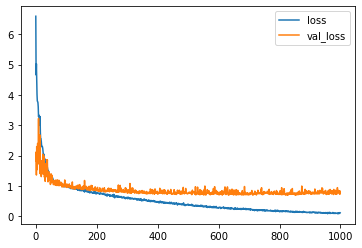

In [42]:
pd.DataFrame(cnnhistory.history)[["loss","val_loss"]].plot()

<AxesSubplot:>

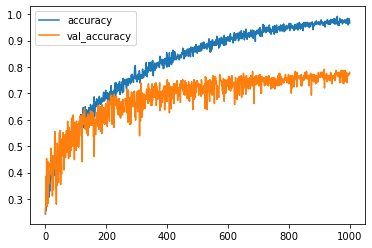

In [43]:
pd.DataFrame(cnnhistory.history)[["accuracy","val_accuracy"]].plot()

In [45]:
predictions=model.predict_classes(x_testcnn)

Confusion matrix, without normalization


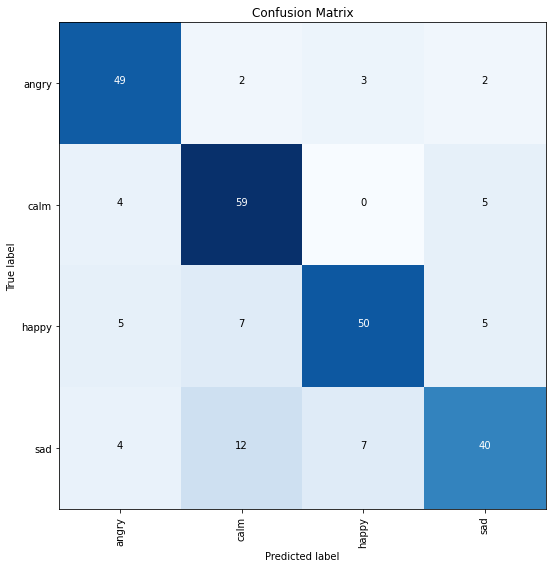

In [46]:
cm = confusion_matrix( y_test,predictions)
plot_confusion_matrix(cm, classes = Le.classes_, title='Confusion Matrix', normalize=False, figname = 'Confusion_matrix_concrete2.jpg')

In [47]:
print(classification_report(y_test,predictions,target_names=Le.classes_))

              precision    recall  f1-score   support

       angry       0.79      0.88      0.83        56
        calm       0.74      0.87      0.80        68
       happy       0.83      0.75      0.79        67
         sad       0.77      0.63      0.70        63

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

